<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/pract_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [13]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload the file

import io
import pandas as pd

file_path = next(iter(uploaded))  # Get the filename from the uploaded dictionary
df = pd.read_csv(io.BytesIO(uploaded[file_path]))  # Read the file into a DataFrame
print("Dataset loaded successfully!")
print(df.head())

Saving Housing.csv to Housing.csv
Dataset loaded successfully!
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [22]:
# Print the actual column names to verify
print(df.columns)

# Define target variable (house price) and features with correct column names
target = "price"  # Update if the column name is different based on what you see in df.columns
features = ["area", "bedrooms",]  # Update 'Age' to the actual column name from df.columns - likely 'age' based on previous cells

X = df[features]
y = df[target]

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [23]:
# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the sets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (436, 2), Testing set: (109, 2)


In [24]:
# Standardize features to improve model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [26]:
# Predict house prices on the test set
y_pred = model.predict(X_test_scaled)


In [27]:
# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 1381158.90
Mean Squared Error (MSE): 3280176595474.01
Root Mean Squared Error (RMSE): 1811125.78


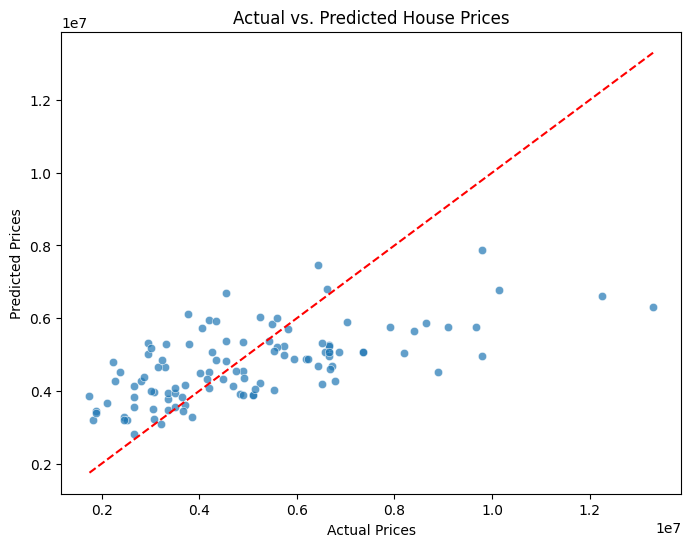

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()


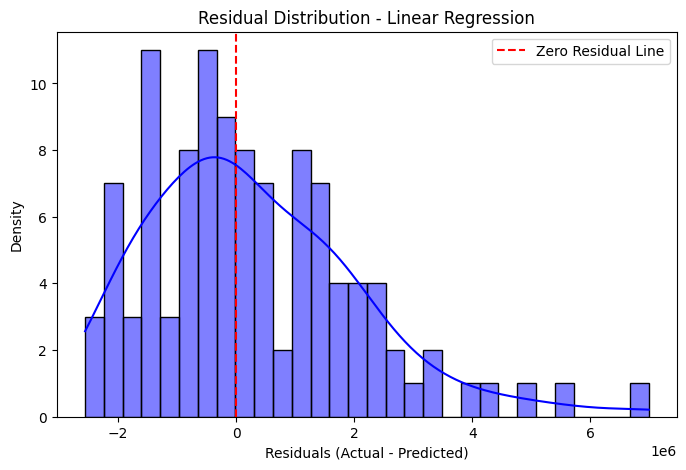

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual Line")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.title("Residual Distribution - Linear Regression")
plt.legend()
plt.show()
